In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../Data/gold/covid_daily_multivariate.csv')
df.head()

,date,country,cases,new_cases,rain,temp,dist_14d_avg,co,humidity,no2,o3,pm10,pm25,so2
0,2020-01-22,Brazil,0,0,0.0,82.3,NaN,2.033333,80.6,4.9,13.3,14.833333,25.566667,1.433333
1,2020-01-22,Brazil,0,0,0.0,82.8,NaN,2.033333,80.6,4.9,13.3,14.833333,25.566667,1.433333
2,2020-01-22,Brazil,0,0,0.0,79.9,NaN,2.033333,80.6,4.9,13.3,14.833333,25.566667,1.433333
3,2020-01-22,Brazil,0,0,0.0,79.7,NaN,2.033333,80.6,4.9,13.3,14.833333,25.566667,1.433333
4,2020-01-22,Brazil,0,0,0.0,87.2,NaN,2.033333,80.6,4.9,13.3,14.833333,25.566667,1.433333


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834026 entries, 0 to 834025
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          834026 non-null  object 
 1   country       834026 non-null  object 
 2   cases         834026 non-null  int64  
 3   new_cases     834026 non-null  int64  
 4   rain          832867 non-null  float64
 5   temp          832867 non-null  float64
 6   dist_14d_avg  295463 non-null  float64
 7   co            741789 non-null  float64
 8   humidity      737206 non-null  float64
 9   no2           741685 non-null  float64
 10  o3            741267 non-null  float64
 11  pm10          741368 non-null  float64
 12  pm25          740876 non-null  float64
 13  so2           741610 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 89.1+ MB


In [45]:
# Step 1: Create the 'time' column first
df['time'] = df.groupby('country').cumcount() + 1

df['future_cases'] = df.groupby('country')['new_cases'].shift(-7)
# Step 2: Convert 'country' column into numeric dummy variables (0 and 1)
df = pd.get_dummies(df, columns=['country'], drop_first=True, dtype=int)

In [46]:
df_numeric = df.select_dtypes(include=['number']).copy()
df_numeric.head()

,cases,new_cases,rain,temp,dist_14d_avg,co,humidity,no2,o3,pm10,...,future_cases,country_Chile,country_Colombia,country_Dominican Republic,country_Germany,country_Italy,country_Mexico,country_Panama,country_US,country_Uruguay
0,0,0,0.0,82.3,NaN,2.033333,80.6,4.9,13.3,14.833333,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0.0,82.8,NaN,2.033333,80.6,4.9,13.3,14.833333,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,79.9,NaN,2.033333,80.6,4.9,13.3,14.833333,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,79.7,NaN,2.033333,80.6,4.9,13.3,14.833333,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,87.2,NaN,2.033333,80.6,4.9,13.3,14.833333,...,0.0,0,0,0,0,0,0,0,0,0


<Axes: >

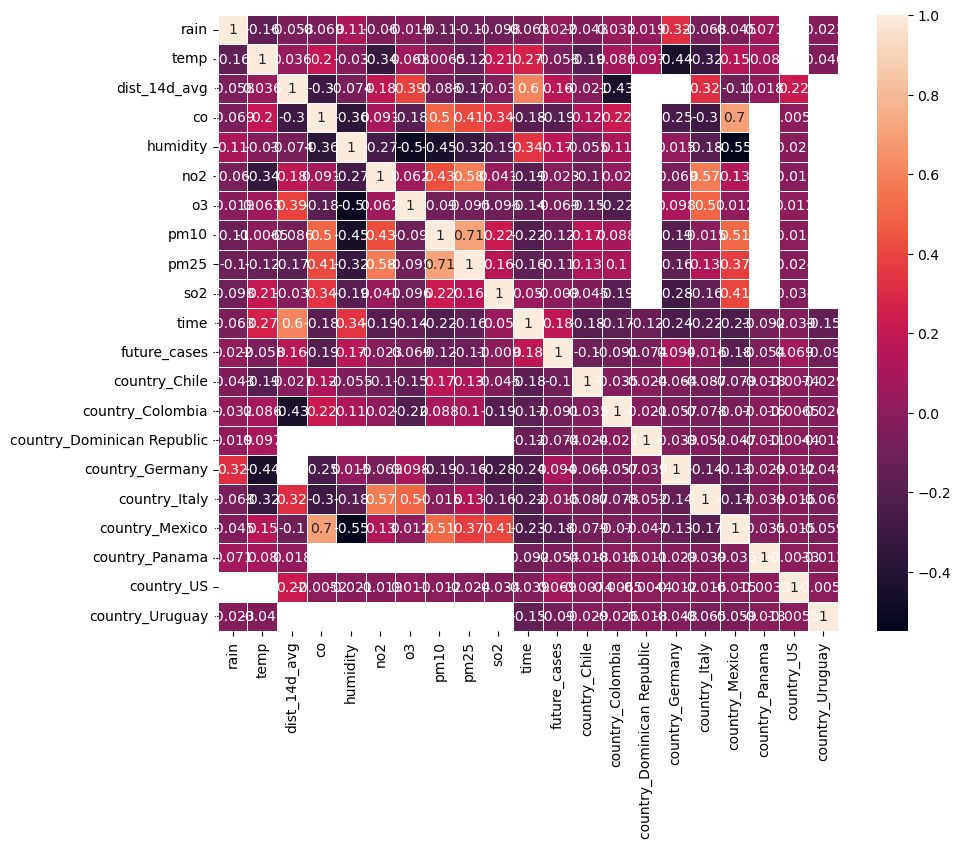

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(df_numeric.drop(columns=['cases', 'new_cases']).corr(), annot=True,  linewidths=.5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834026 entries, 0 to 834025
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   date                        834026 non-null  object 
 1   cases                       834026 non-null  int64  
 2   new_cases                   834026 non-null  int64  
 3   rain                        832867 non-null  float64
 4   temp                        832867 non-null  float64
 5   dist_14d_avg                295463 non-null  float64
 6   co                          741789 non-null  float64
 7   humidity                    737206 non-null  float64
 8   no2                         741685 non-null  float64
 9   o3                          741267 non-null  float64
 10  pm10                        741368 non-null  float64
 11  pm25                        740876 non-null  float64
 12  so2                         741610 non-null  float64
 13  time          

In [48]:
import statsmodels.api as sm

In [50]:
Y = df[['future_cases']]
X = df.drop(columns = ['cases', 'future_cases', 'date'])
X = sm.add_constant(X)
model = sm.OLS(Y,X, missing='drop')
results = model.fit()
results.summary()

C:\Users\danie\anaconda3\envs\thesis\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           future_cases   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.919e+05
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:36:21   Log-Likelihood:            -2.6165e+06
No. Observations:              264676   AIC:                         5.233e+06
Df Residuals:                  264660   BIC:                         5.233e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -126.0087     85.834     -1.468      0.142    -294.241      42.224
new_cases                      0.9654      0.001   1893.768      0.000       0.964       0.966
rain                           0.2427      0.383      0.633      0.526      -0.508       0.994
temp                           3.5119      0.984      3.570      0.000       1.584       5.440
dist_14d_avg                 -10.2346      2.104     -4.864      0.000     -14.358      -6.111
co                            -2.6585      2.656     -1.001      0.317      -7.864       2.547
humidity                       0.7868      1.003      0.784      0.433      -1.179       2.753
no2                           -4.9913      2.404     -2.077      0.038      -9.702      -0.280
o3                            -0.6100      1.443     -0.423      0.673      -3.439       2.219
pm10                          -1.3245      0.693     -1.912      0.056      -2.682       0.033
pm25                           2.9377      0.549      5.346      0.000       1.861       4.015
so2                           18.1290      5.327      3.403      0.001       7.688      28.570
time                           0.0068      0.000     15.167      0.000       0.006       0.008
country_Chile                 12.9723     34.416      0.377      0.706     -54.483      80.428
country_Colombia             -83.4362     45.597     -1.830      0.067    -172.806       5.934
country_Dominican Republic  2.338e-14    3.6e-15      6.491      0.000    1.63e-14    3.04e-14
country_Germany                     0          0        nan        nan           0           0
country_Italy                210.3831     43.554      4.830      0.000     125.018     295.748
country_Mexico              -265.9279     34.559     -7.695      0.000    -333.662    -198.194
country_Panama                      0          0        nan        nan           0           0
country_US                          0          0        nan        nan           0           0
country_Uruguay                     0          0        nan        nan           0           0
==============================================================================
Omnibus:                   227471.493   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      17596602025.304
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                    1266.165   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix 

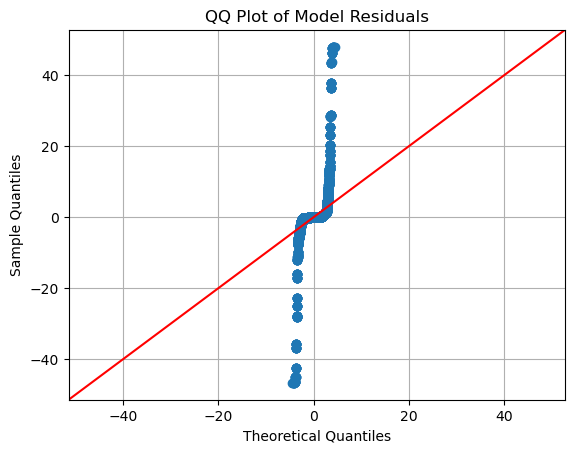

In [51]:
# Generate QQ plot of residuals
sm.qqplot(results.resid, line='45', fit=True)
plt.title('QQ Plot of Model Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


## Lasso

In [67]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_lasso = df.copy().dropna()

# Prepare Y and X
Y = df_lasso['future_cases']
X = df_lasso.drop(columns=['cases', 'future_cases', 'date'])

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify numeric features (excluding dummies)
numeric_features = [col for col in X.select_dtypes(include=['number']).columns if not col.startswith('country_')]

# Create a column transformer (scale only numeric features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='passthrough'  # Keeps dummy variables as 0/1
)

# Use LassoCV instead of fixed alpha
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, random_state=42, max_iter=10000)

# Create pipeline
model_pipeline = make_pipeline(preprocessor, lasso_cv)

# Fit model
model_pipeline.fit(X_train, Y_train)

# Predict
Y_pred = model_pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")
print(f"Best Alpha: {model_pipeline.named_steps['lassocv'].alpha_}")  # Get best alpha

# Retrieve coefficients correctly
feature_names = preprocessor.get_feature_names_out()
coefficients = model_pipeline.named_steps['lassocv'].coef_

# Create DataFrame of coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

print(coeff_df)

MSE: 21845187.028
R²: 0.944
Best Alpha: 1.0
                                  Feature   Coefficient
0                          num__new_cases  19246.453092
16               remainder__country_Italy    267.978023
11                              num__time    248.694391
9                               num__pm25     70.098748
12               remainder__country_Chile     48.894705
2                               num__temp     41.309818
10                               num__so2     40.279526
5                           num__humidity     12.161528
1                               num__rain      4.569088
18              remainder__country_Panama      0.000000
19                  remainder__country_US      0.000000
13            remainder__country_Colombia     -0.000000
14  remainder__country_Dominican Republic      0.000000
20             remainder__country_Uruguay      0.000000
15             remainder__country_Germany      0.000000
7                                 num__o3     -9.086831
4   